# Statistics in Action with a Project

## Task 1,2: Import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats


## Task 3: Import csv file as a DataFrame

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


## Task 4: Generate Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a boxplot

[Text(0.5, 1.0, 'Boxplot of owner-occupied homes'),
 Text(0.5, 0, 'Median value')]

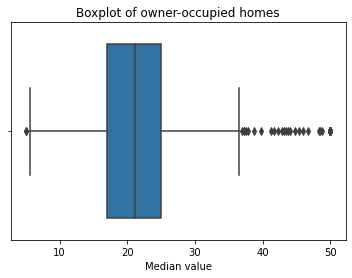

In [4]:
sns.boxplot(x="MEDV", data=boston_df).set(title="Boxplot of owner-occupied homes", xlabel="Median value")

Provide a  **bar plot** for the Charles river variable

[Text(0.5, 1.0, 'Number of houses by Charles river variable'),
 Text(0.5, 0, 'Charles river bounded')]

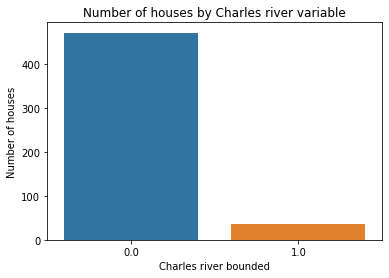

In [5]:
chas_df = boston_df.groupby(["CHAS"])["CHAS"].count().reset_index(name="Number of houses")
sns.barplot(x="CHAS",y="Number of houses", data=chas_df).set(title="Number of houses by Charles river variable", xlabel="Charles river bounded")

Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 1.0, 'Number of houses by age groups'), Text(0.5, 0, 'Age Groups')]

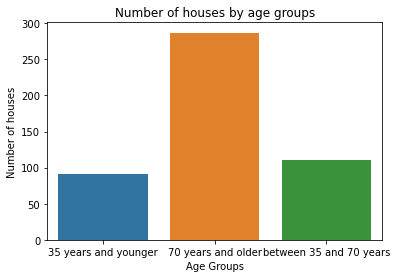

In [6]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 40)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


age_df = boston_df.groupby(["age_group"])["age_group"].count().reset_index(name="Number of houses")
sns.barplot(x="age_group", y="Number of houses", data=age_df).set(title="Number of houses by age groups",
                                                                  xlabel="Age Groups")

Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0.5, 1.0, 'Relationship of NO2 concentration and non-retail business'),
 Text(0.5, 0, 'Acres'),
 Text(0, 0.5, 'NO2 concentration')]

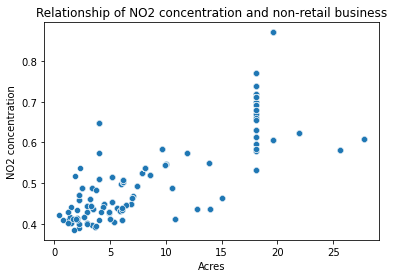

In [7]:
sns.scatterplot(x='INDUS',y="NOX",data=boston_df).set(title="Relationship of NO2 concentration and non-retail business",
                                                      xlabel="Acres",
                                                      ylabel="NO2 concentration")

Comment: There is a moderately strong positive linear correlation between NO2 concentrations and proportion of non-retail business acres per town

Create a **histogram** for the pupil to teacher ratio variable

[Text(0.5, 1.0, 'Distribution of pupil to teacher ratio variable'),
 Text(0.5, 0, 'Pupil/Teacher')]

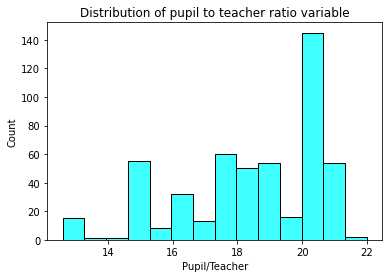

In [8]:
sns.histplot(boston_df['PTRATIO'], color="Cyan", kde=False).set(title="Distribution of pupil to teacher ratio variable", xlabel="Pupil/Teacher")

## Task 5: Hypothesis Tests

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [9]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

Since P-Value = 0.003 < 0.05, we reject the null hypothesis and conclude that the variances of the two datasets are different.

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ (The two mean values for Charles bounded and Charles not bounded are the same)
*   $H\_1: µ\_1 \neq µ\_2$ (The two mean values for Charles bounded and Charles not bounded are not the same)

In [10]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

Since P-Value = 0.003 < 0.05, we reject the null hypothesis and conclude that the mean values of the two datasets are significantly different.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [11]:
thirty_five_lower_age = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_age = boston_df[boston_df['age_group'] == 'between 35 and 70 years' ]['MEDV']
seventy_older_age = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

scipy.stats.levene(thirty_five_lower_age, thirtyfive_seventy_age, seventy_older_age, center="mean")

LeveneResult(statistic=3.033414657847652, pvalue=0.049065505638078565)

That is a close one! The P-value is less than 0.05, so we reject the null hypothesis and conclude the variances are different

In [12]:
scipy.stats.f_oneway(thirty_five_lower_age, thirtyfive_seventy_age, seventy_older_age)

F_onewayResult(statistic=34.871980127572854, pvalue=7.078159377148967e-15)

The P-value is less than 0.05 so we reject the null hypothesis H_0 and conclude at least one mean is different from the others.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:
*   $H\_0:$ There is no correlation between NO2 concentrations and proportion of non-retail business acres per town (ρ=0)
*   $H\_1:$  There is correlation between NO2 concentrations and proportion of non-retail business acres per town (ρ<>0)

In [14]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

The P-value is way too small (7.9 x 10^-98) < 0.05 so we reject the null hypothesis H0 and conclude that there is correlation between NO2 concentration and proportion of non-retail business acress per town.

## Task 6: Share your Jupyter Notebook. 

THE END!